In [1]:
import glob
import os
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns

In [2]:
tax_dir = "data/combined-derep.rdp-tax-99.ms2.taxa-tables/"
tax_fps = glob.glob(os.path.join(tax_dir, '*L[1234567].txt'))
sample_md = pd.read_csv("./data/master-map.tsv", sep='\t', index_col="#SampleID").replace("no_data", np.nan).convert_objects(convert_numeric=True)
_tax_tables = []
all_taxa = []
for e in tax_fps:
    _tax_table = pd.read_csv(e, sep='\t', skiprows=1, index_col=0).T
    _tax_tables.append(_tax_table.T / _tax_table.T.sum())
    all_taxa.extend(_tax_table.columns)
sample_md = pd.concat([sample_md] + [e.T for e in _tax_tables], axis=1)

/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [3]:
# These taxa come from Tal's "Cancer Targets" document - still some more to transfer, but this is looking promising so far

from crc import pairwise_corr_all

metrics = ['Derep-WeightedUniFrac-PC1', 
           'Derep-UnweightedUniFrac-PC1',
           'Derep-PD',
           'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales',
           'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides',
           'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus',
           'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus',
           'k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium',
           'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Providencia',
           'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus',
           'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Shigella']

pairwise_corr_all(sample_md[metrics], sample_md[['Derep-UnweightedUniFrac-PC1']])


,r,p,q
"(Derep-WeightedUniFrac-PC1, Derep-UnweightedUniFrac-PC1)",0.442780,1.204763e-44,4.417466e-44
"(Derep-UnweightedUniFrac-PC1, Derep-UnweightedUniFrac-PC1)",1.000000,0.000000e+00,0.000000e+00
"(Derep-PD, Derep-UnweightedUniFrac-PC1)",-0.686189,1.064249e-125,5.853368e-125
"(k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales, Derep-UnweightedUniFrac-PC1)",-0.067808,4.163432e-02,5.088639e-02
"(k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides, Derep-UnweightedUniFrac-PC1)",-0.331498,1.331689e-24,3.662144e-24
"(k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus, Derep-UnweightedUniFrac-PC1)",0.229508,2.940384e-12,6.468845e-12
"(k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus, Derep-UnweightedUniFrac-PC1)",0.077515,1.982787e-02,2.726332e-02
"(k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium, Derep-UnweightedUniFrac-PC1)",0.196117,2.799382e-09,5.132200e-09
"(k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae;g__Providencia, Derep-UnweightedUniFrac-PC1)",-0.033702,3.117159e-01,3.117159e-01
"(k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus, Derep-UnweightedUniFrac-PC1)",0.060726,6.815791e-02,7.497370e-02


In [4]:
from crc import get_group_pairs

udca_pairs = get_group_pairs(sample_md, 'UDCA')
placebo_pairs = get_group_pairs(sample_md, 'placebo')

/Users/caporaso/Dropbox/code/crc-udca1/crc.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[state_category] == state_value) & (df[individual_id_category] == individual_id)].index


No values for ptid UM31915 at visit pre
Multiple values for ptid UT50660 at visit pre (udca.trial.67S0EK4EGQNNQ udca.trial.FNZR19VTZNT6)
No values for ptid UT50742 at visit pre
No values for ptid UM30512 at visit pre
Multiple values for ptid UC20187 at visit pre (udca.trial.3NNMROQUFCD5O udca.trial.7PQYCS18UI6V4)
No values for ptid UT50013 at visit post
No values for ptid UM30480 at visit post
No values for ptid UM30958 at visit post
No values for ptid US10191 at visit post
Multiple values for ptid UT50004 at visit post (udca.trial.3BC6KPH571F7A udca.trial.6OMSAKAM0LWGB)
Multiple values for ptid UM30422 at visit pre (udca.trial.3BZF24H1SU9RY udca.trial.63JUT2LK6HRR7)
No values for ptid UM30894 at visit pre
No values for ptid US11258 at visit pre
Multiple values for ptid UC20344 at visit post (udca.trial.265DU6B42E0FG udca.trial.7O7XM37JQV7RZ)
No values for ptid UT50663 at visit pre
No values for ptid US10700 at visit post
Multiple values for ptid UM30827 at visit pre (udca.trial.4HTGA2

In [5]:
from statsmodels.sandbox.stats.multicomp import multipletests

def paired_differences(df, pairs, category):
    result = []
    for pre_idx, post_idx in pairs:
        pre_value = df[category][pre_idx]
        post_value = df[category][post_idx]
        paired_difference = post_value - pre_value
        if not np.isnan(paired_difference):
            result.append(paired_difference)
    return result
    

def paired_differences_table(df, pairs, categories, multipletests_method='fdr_bh'):
    data = []
    for category in categories:
        diffs = paired_differences(df, pairs, category)
        wilcoxon_s, wilcoxon_p = scipy.stats.wilcoxon(diffs)
        t, t_p = scipy.stats.ttest_1samp(diffs, 0)
        data.append([np.percentile(diffs, 25), np.percentile(diffs, 50), np.percentile(diffs, 75),
                     wilcoxon_s, wilcoxon_p, t, t_p, diffs])
    result = pd.DataFrame(data, index=categories,
                          columns=['25th percentile', 'Median', '75th percentile',
                                   'Wilcoxon', 'Wilcoxon p-value', 't-statistic', 't p-value', 'Differences'])
    result['Wilcoxon q-value'] = multipletests(result['Wilcoxon p-value'],
                                               method=multipletests_method)[1]
    result['t q-value'] = multipletests(result['t p-value'],
                                               method=multipletests_method)[1]
    return result.sort('Wilcoxon q-value', ascending=True)



udca_taxa_difference_table = paired_differences_table(sample_md,
                                                  get_group_pairs(sample_md, 'UDCA', verbose=False),
                                                  all_taxa)
udca_taxa_difference_table[:5]

/Users/caporaso/Dropbox/code/crc-udca1/crc.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[state_category] == state_value) & (df[individual_id_category] == individual_id)].index
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,25th percentile,Median,75th percentile,Wilcoxon,Wilcoxon p-value,t-statistic,t p-value,Differences,Wilcoxon q-value,t q-value
Unclassified;Other,0.000003,0.000491,0.001165,4423.0,3.549603e-15,-1.329322,0.185157,"[0.000368682146382, -0.000955260406201, 9.5975...",NaN,NaN
k__Archaea;Other,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
k__Archaea;p__Crenarchaeota,0.000000,0.000000,0.000000,0.0,3.173105e-01,-1.000000,0.318440,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
k__Archaea;p__Euryarchaeota,-0.000089,0.000000,0.000028,3910.0,3.427440e-01,-1.396430,0.164032,"[0.0, -3.69754113515e-05, 0.00124985136885, 0....",NaN,NaN
k__Bacteria;Other,-0.000730,0.002595,0.007304,6280.0,5.332768e-09,-2.070211,0.039633,"[-0.00129850397382, -0.00650603755779, 0.00326...",NaN,NaN


In [6]:
placebo_taxa_difference_table = paired_differences_table(sample_md,
                                                  get_group_pairs(sample_md, 'placebo', verbose=False),
                                                  all_taxa)
placebo_taxa_difference_table[:5]

/Users/caporaso/Dropbox/code/crc-udca1/crc.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[state_category] == state_value) & (df[individual_id_category] == individual_id)].index
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,25th percentile,Median,75th percentile,Wilcoxon,Wilcoxon p-value,t-statistic,t p-value,Differences,Wilcoxon q-value,t q-value
Unclassified;Other,-0.000099,0.00038,0.001128,5220.0,1.871695e-11,3.405587,0.000790,"[0.00160533835385, 0.000903206151404, 0.003831...",NaN,NaN
k__Archaea;Other,0.000000,0.00000,0.000000,0.0,3.173105e-01,-1.000000,0.318456,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
k__Archaea;p__Crenarchaeota,0.000000,0.00000,0.000000,0.0,1.088094e-01,1.632597,0.104045,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
k__Archaea;p__Euryarchaeota,-0.000082,0.00000,0.000323,4474.0,1.368165e-01,2.225491,0.027107,"[0.0, -0.000543604876912, -0.000442759310964, ...",NaN,NaN
k__Bacteria;Other,-0.001037,0.00219,0.006538,6345.0,5.074201e-08,-1.319036,0.188587,"[0.0076610662357, 0.00124504945705, 0.02094981...",NaN,NaN


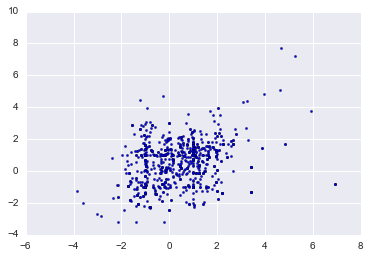

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
mpld3.enable_notebook()



fig, ax = plt.subplots()
combined_taxa_differences = pd.DataFrame([placebo_taxa_difference_table['t-statistic'],
                                          udca_taxa_difference_table['t-statistic']], 
                                         index=['Placebo', 'UDCA']).T

points = ax.scatter(combined_taxa_differences['Placebo'], 
                    combined_taxa_differences['UDCA'],
                    s=5)

labels = [' '.join(e.split(';')[-2:]) for e in placebo_taxa_difference_table.index]
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)

mpld3.plugins.connect(fig, tooltip)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

placebo_paired_difference_table = paired_differences_table(sample_md,
                                                  get_group_pairs(sample_md, 'placebo', verbose=False),
                                                  metrics)
udca_paired_difference_table = paired_differences_table(sample_md,
                                                  get_group_pairs(sample_md, 'UDCA', verbose=False),
                                                  metrics)

for category in metrics:
    placebo_stats = placebo_paired_difference_table['Wilcoxon q-value'][category]
    ax = sns.distplot(placebo_paired_difference_table['Differences'][category],
                      label='Placebo (q=%1.2e)' % placebo_stats)
    udca_stats = udca_paired_difference_table['Wilcoxon q-value'][category]
    ax = sns.distplot(udca_paired_difference_table['Differences'][category],
                      label='UDCA (q=%1.2e)' % udca_stats)
    ax.axvline(0, ls='--', c='k', label='No change')
    ax.legend(loc=2)
    ax.set_ylabel('Frequency')
    ax.get_figure().savefig('data/paired-difference-plots/%s.pdf' % category.replace(' ', '-'))
    plt.clf()

/Users/caporaso/Dropbox/code/crc-udca1/crc.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[state_category] == state_value) & (df[individual_id_category] == individual_id)].index
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/scipy/stats/morestats.py:2384: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/ipykernel/__main__.py:29: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/caporaso/miniconda3/envs/crc-udca1/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
